In [4]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('../datasets/one_hot_encoded/combined-data.csv').groupby("Year", as_index=False).mean()

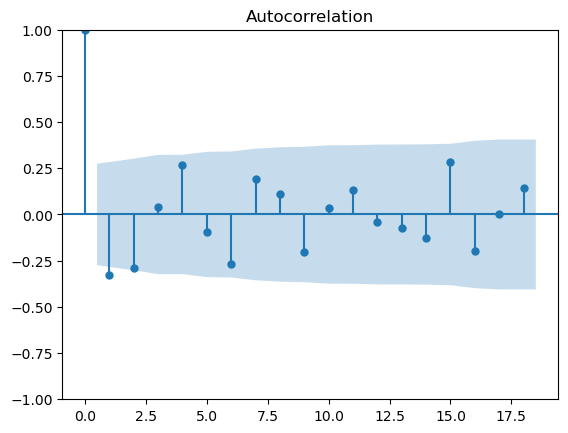

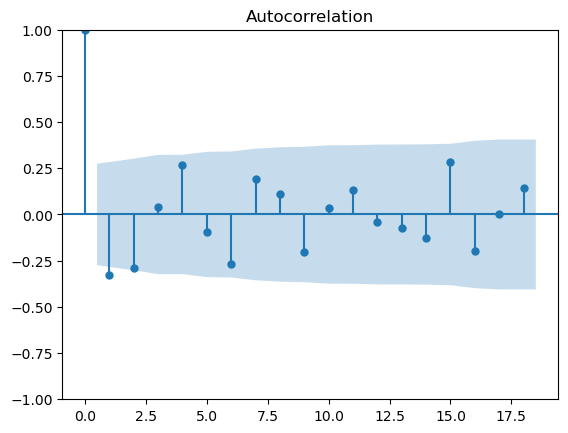

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
data.Temperature.diff().describe()
plot_acf(data.Temperature.diff().dropna())

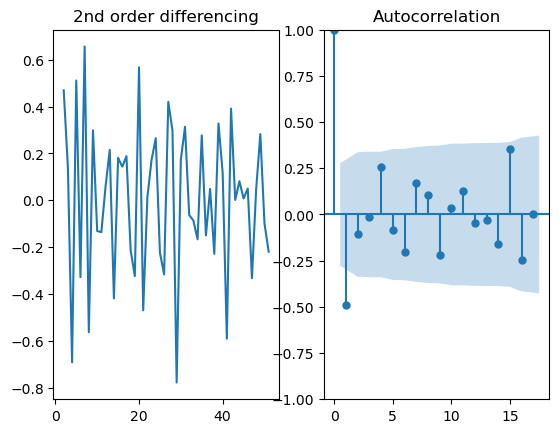

In [7]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(data.Temperature.diff().diff().dropna())

ax2 = f.add_subplot(122)
plot_acf(data.Temperature.diff().diff().dropna(), ax=ax2)
plt.show()

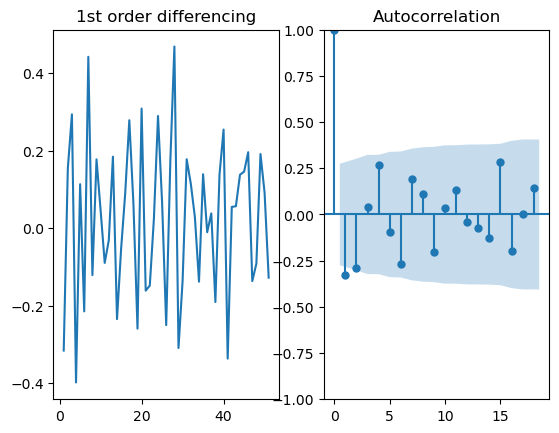

In [8]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(data.Temperature.diff().dropna())

ax2 = f.add_subplot(122)
plot_acf(data.Temperature.diff().dropna(), ax=ax2)
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.Temperature)
print("p-value: ", result[1])

result = adfuller(data.Temperature.diff().dropna())
print("1st diff p-value: ", result[1])

result = adfuller(data.Temperature.diff().diff().dropna())
print("2nd diff p-value: ", result[1])

p-value:  0.978613659739638
1st diff p-value:  1.4756444943196828e-11
2nd diff p-value:  8.988537979788945e-05


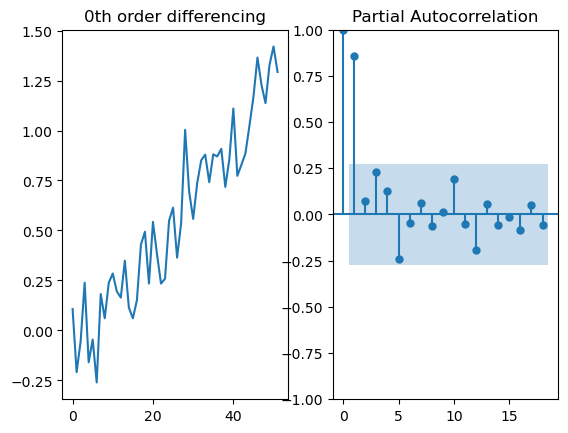

In [10]:
# 1st difference is beyond the 0.05 test threshold, so that is our d value
# d = 1

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('0th order differencing')
ax1.plot(data.Temperature)

ax2 = f.add_subplot(122)
plot_pacf(data.Temperature, ax=ax2)
plt.show()

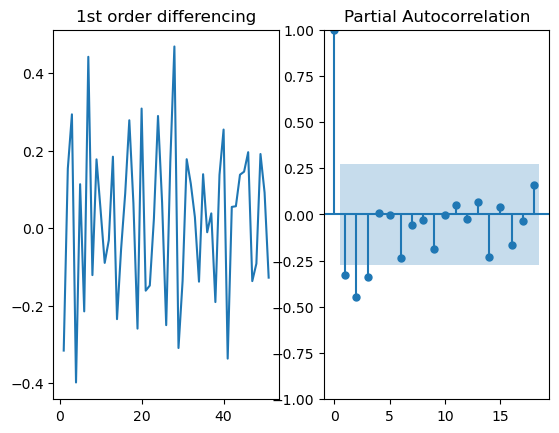

In [11]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(data.Temperature.diff().dropna())

ax2 = f.add_subplot(122)
plot_pacf(data.Temperature.diff().dropna(), ax=ax2)
plt.show()

In [12]:
# 1st bar is most significant in both autocorrelations, so we set p = 1


# We use the formula ARIMA(p = 1, d=1, q=2)

In [151]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(data, shuffle=False, test_size=0.3)

arima_model = ARIMA(train_data.Temperature, order=(1, 1, 2), exog=train_data.Co2)
model = arima_model.fit()
print(model.summary())
# train_data.head()

                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:                   36
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  15.271
Date:                Tue, 19 Mar 2024   AIC                            -20.541
Time:                        13:34:19   BIC                            -12.765
Sample:                             0   HQIC                           -17.857
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Co2            0.0214      0.003      6.152      0.000       0.015       0.028
ar.L1         -0.9003      0.284     -3.169      0.002      -1.457      -0.343
ma.L1         -0.0030   1317.499  -2.27e-06      1.0

/opt/anaconda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


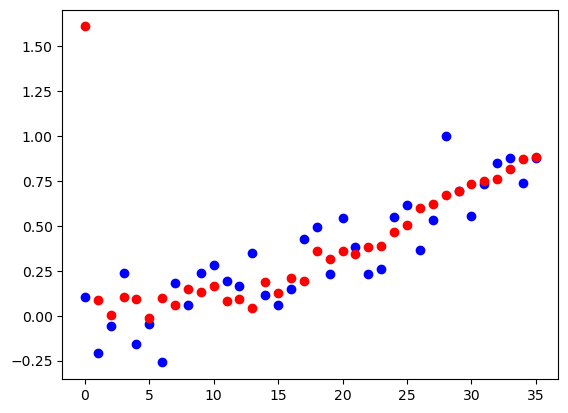

In [152]:
p = model.predict()

# p.head()
# print(p.tolist())
# plt.scatter(data.Year-1970, data.Temperature, color="blue")
plt.scatter(train_data.Year-1970, train_data.Temperature, color="blue")
plt.scatter(p.index, p.tolist(), color="red")
# plt.show()

# plt.plot(model.simulate(20000, anchor=49))

# plt.show()

/opt/anaconda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


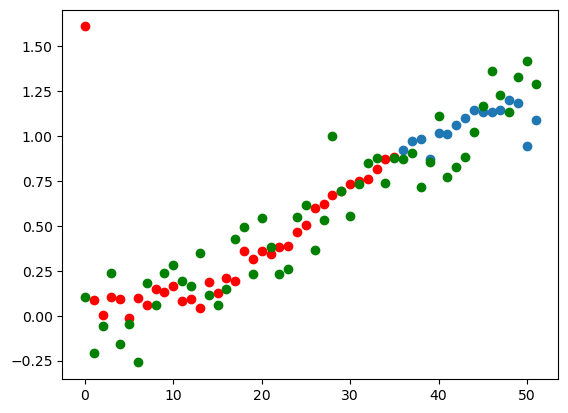

In [153]:
forecast = model.forecast(steps=len(test_data), exog=test_data.Co2)

# Plot the forecasted / test data
plt.scatter(forecast.index, forecast)

# plot the previously trained data as interpreted by the model
plt.scatter(p.index, p.tolist(), color="red")


plt.scatter(data.Year-1970, data.Temperature, color="green")


In [137]:
# Determine the accuracy of the future predictions based on the actual data we have for the future

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(test_data.Temperature, forecast))
r2 = r2_score(test_data.Temperature, forecast)

print("RMSE of forecast: ", rmse)
print("R2 of forecast: ", r2)

RMSE of forecast:  0.1751484109094552
R2 of forecast:  0.3702733635888429


In [15]:
data = pd.read_csv('../datasets/one_hot_encoded/combined-data.csv')
cc = [c for c in data.columns if c.startswith("Country_")]
import math 
maxdg = -math.inf
mindg = +math.inf
maxdc = None 
mindc = None 

for c in cc:
    q = f"`{c}` == 1"
    entries = data.query(q)

    diffs = entries

    maxd = max(diffs.Co2)
    mind = min(diffs.Co2)
    if maxd > maxdg:
        maxdg = maxd 
        maxdc = c
    if mind < mindg:
        mindg = mind 
        mindc = c

print(maxdc, mindc)
print(maxdg, mindg)
    

Country_United States Country_Anguilla
6004.362376 0.002108963


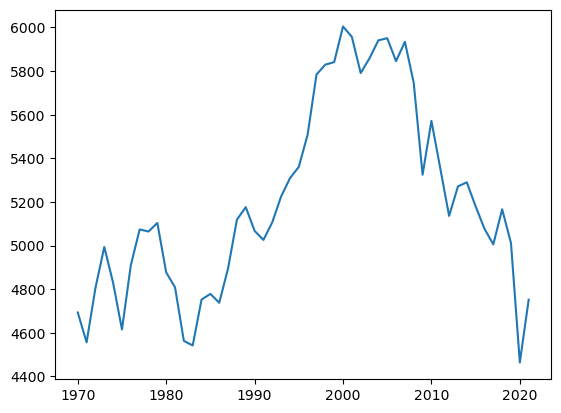

In [20]:
data = pd.read_csv('../datasets/one_hot_encoded/combined-data.csv').query("`Country_United States` == 1").dropna()

plt.plot(data.Year, data.Co2)

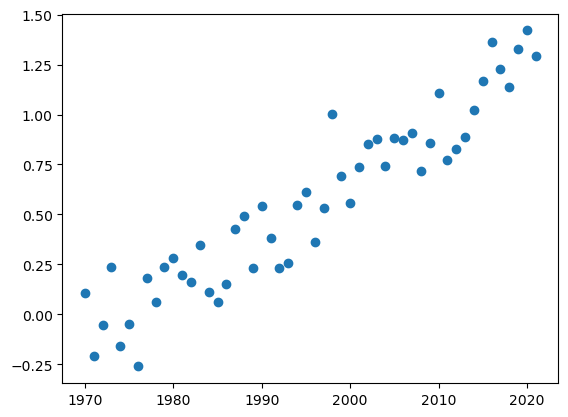

In [18]:
data = pd.read_csv('../datasets/one_hot_encoded/combined-data.csv').groupby("Year", as_index=False).mean()


plt.scatter(data.Year, data.Temperature)
